In [55]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

In [56]:
data = pd.read_csv('C:Asset/bank-additional-full.csv', sep=';')

In [57]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [58]:
# Function to create scrollable table within a small window
def create_scrollable_table(data, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += data.to_html()
    html += '</div>'
    return html

In [59]:
data.shape 

(41188, 21)

In [60]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [61]:
#  Summary statistics for numerical features
numerical_features = data.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrollable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [62]:
# Summary statistics for categorical features
categorical_features = data.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
html_categorical = create_scrollable_table(cat_summary_stats, 'categorical_features', 'Summary statistics for categorical features')

display(HTML(html_categorical ))

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [63]:
# Null values in the dataset
null_values = data.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Null values in the dataset')

# Percentage of missing values for each feature
missing_percentage = (data.isnull().sum() / len(data)) * 100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Percentage of missing values for each feature')

display(HTML(html_null_values + html_missing_percentage))

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [64]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [65]:
#  Replace columns names that have periods (.) with an underscore (_)
# rep_column_names = data.columns

# data.columns = rep_column_names.str.replace('.','_')

# data.head()


# EDA

In [66]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()

Unique values in column age:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Unique values in column job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in column marital:
['married' 'single' 'divorced' 'unknown']

Unique values in column education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in column default:
['no' 'unknown' 'yes']

Unique values in column housing:
['no' 'yes' 'unknown']

Unique values in column loan:
['no' 'yes' 'unknown']

Unique values in column contact:
['telephone' 'cellular']

Unique values in column month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Uni

In [67]:
# Check For Duplicates
duplicate_count = data.duplicated().sum()
print("Number of duplicate values in the dataset:", duplicate_count)

Number of duplicate values in the dataset: 12


# Univariate Analysis

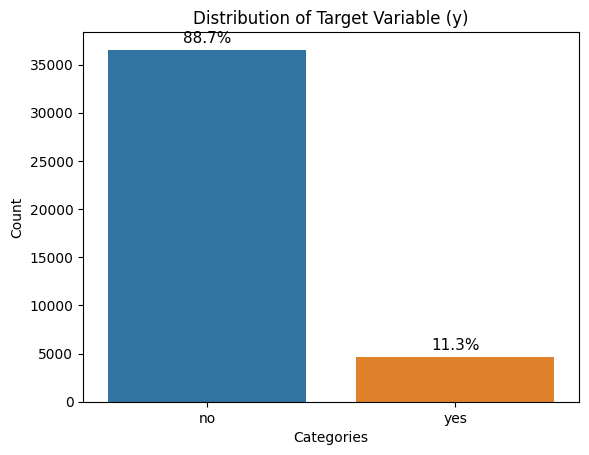

In [68]:
ax = sns.countplot(data=data, x='y')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Categories')
plt.ylabel('Count')

# Adding percentages
total = len(data['y'])
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()


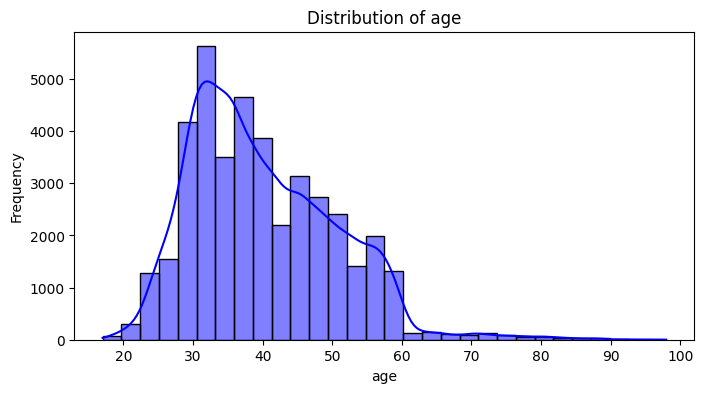

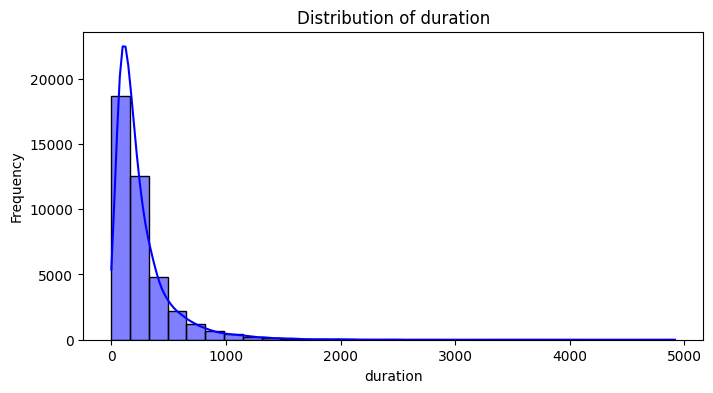

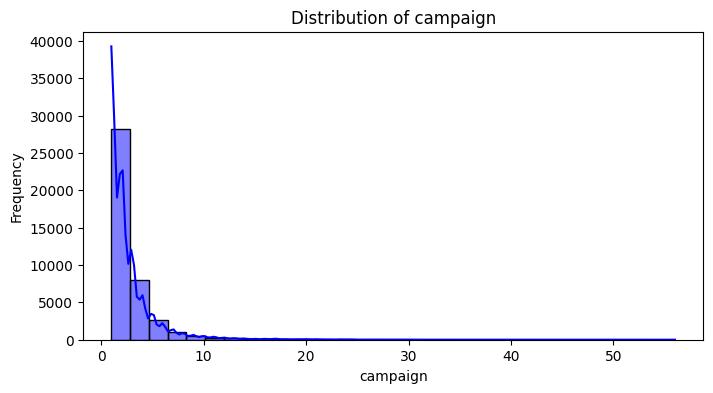

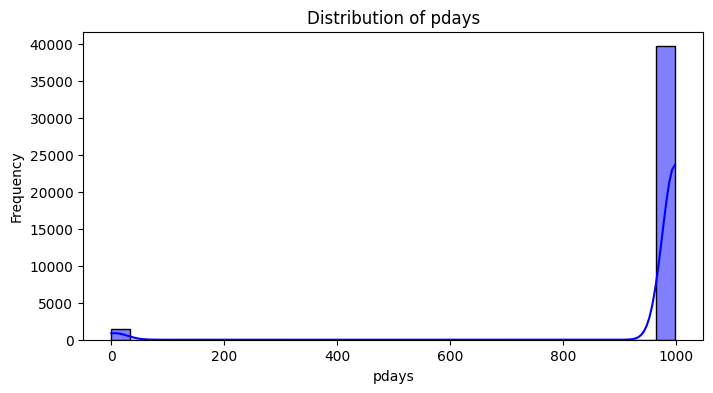

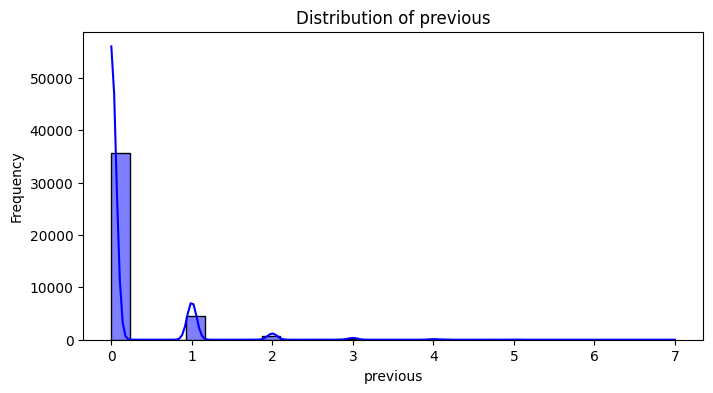

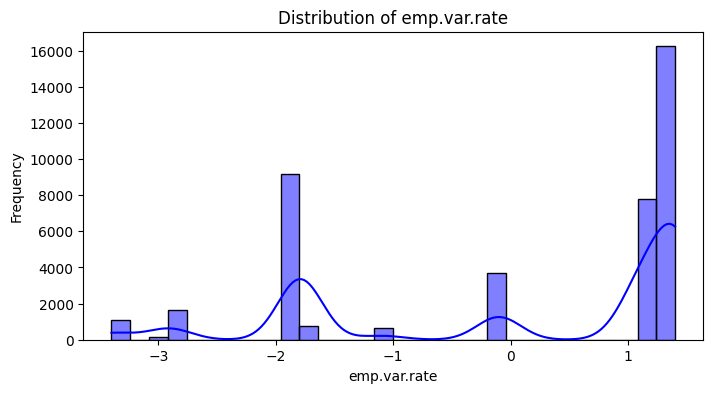

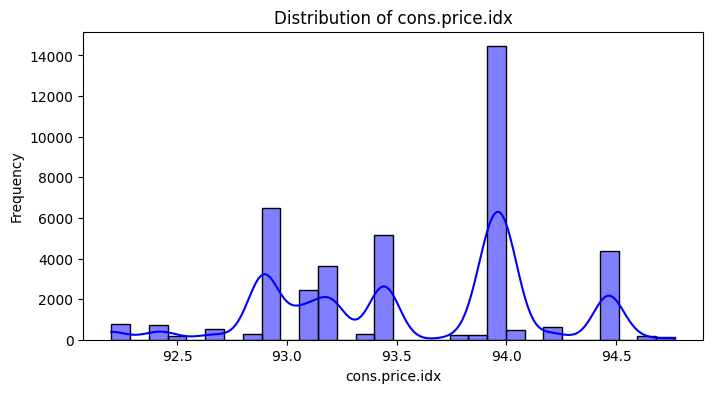

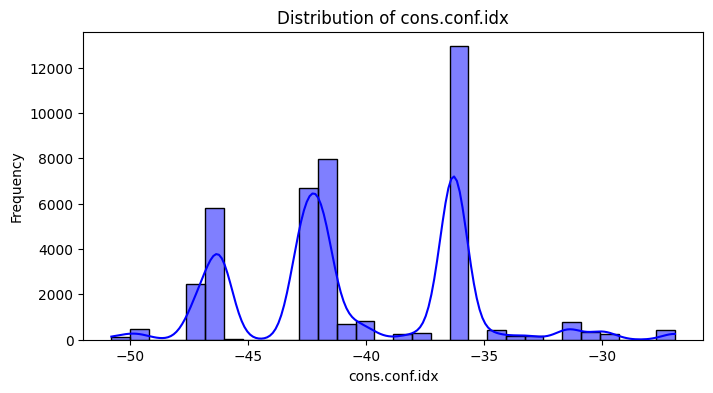

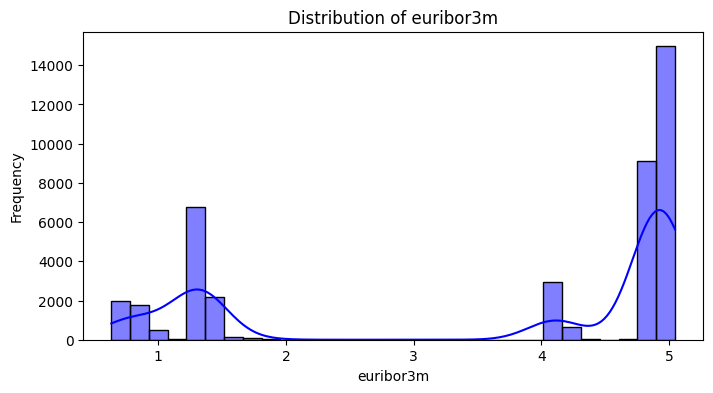

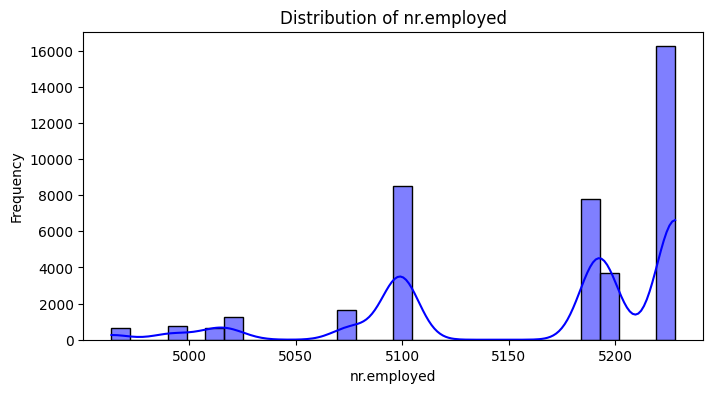

In [69]:
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


##### Distributions (e.g., normal, skewed) using histograms or boxplots. Outliers that might distort analysis or model performance. Key statistics like mean, median, and standard deviation.


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


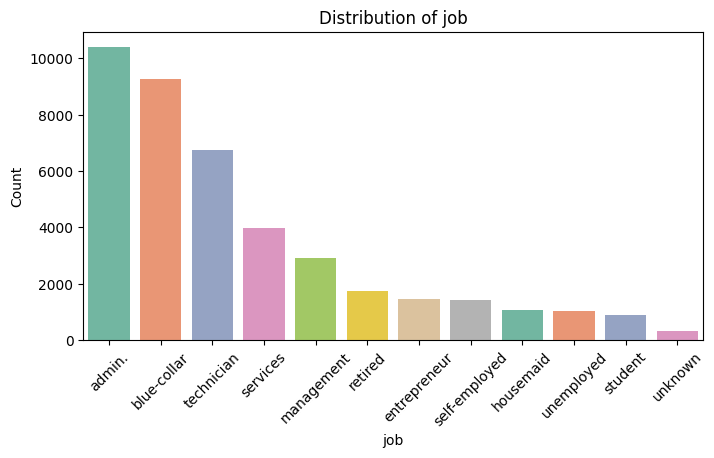

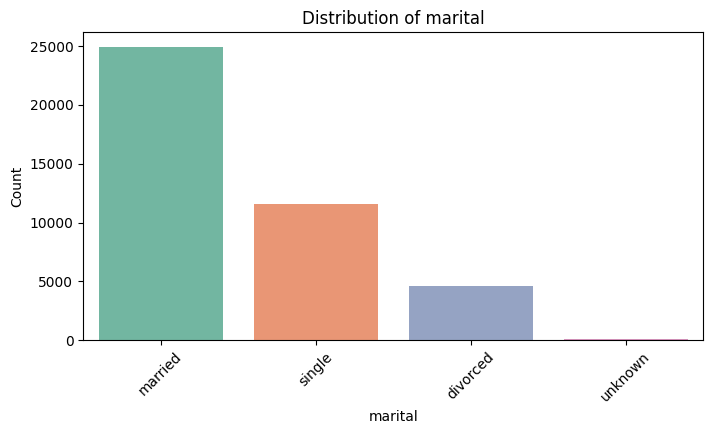

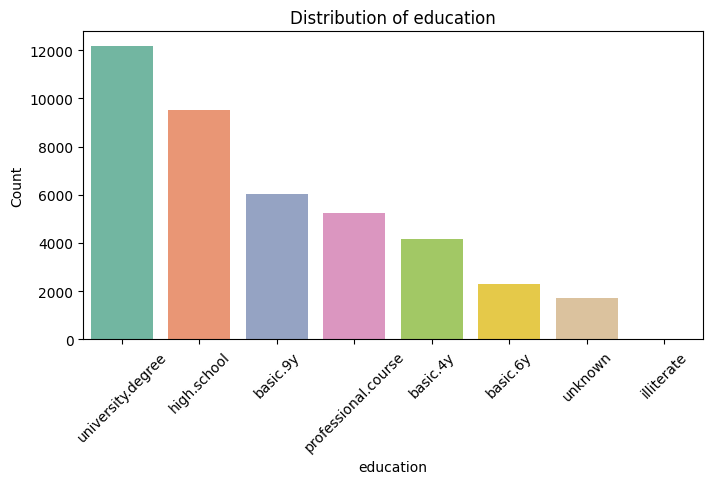

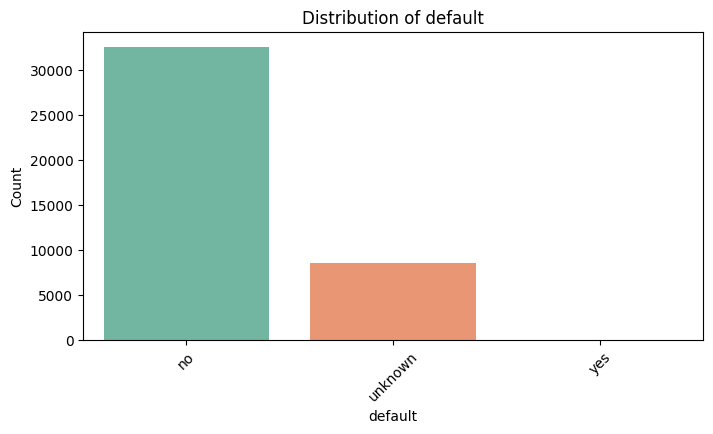

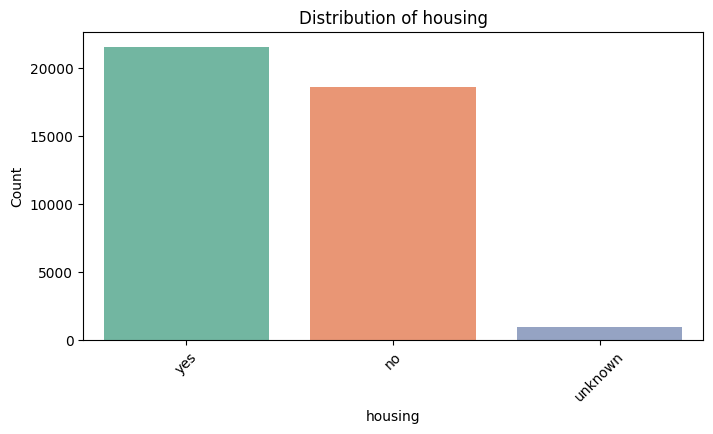

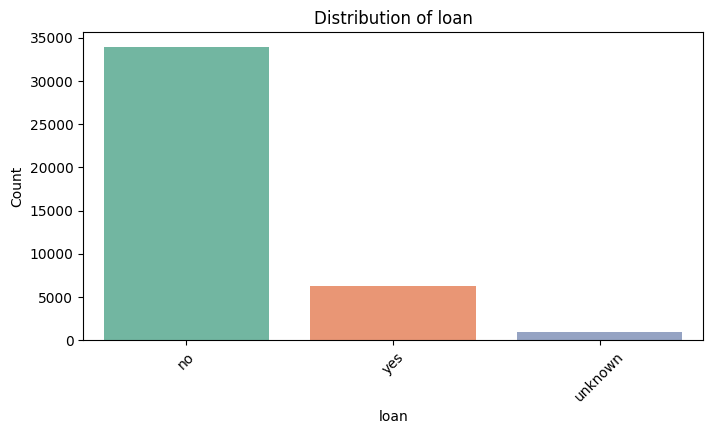

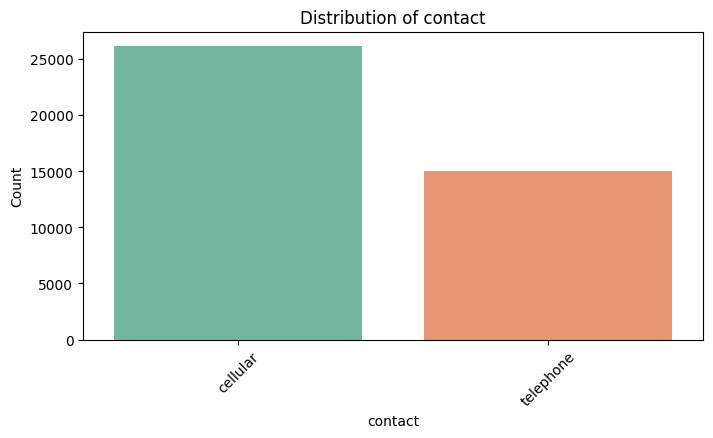

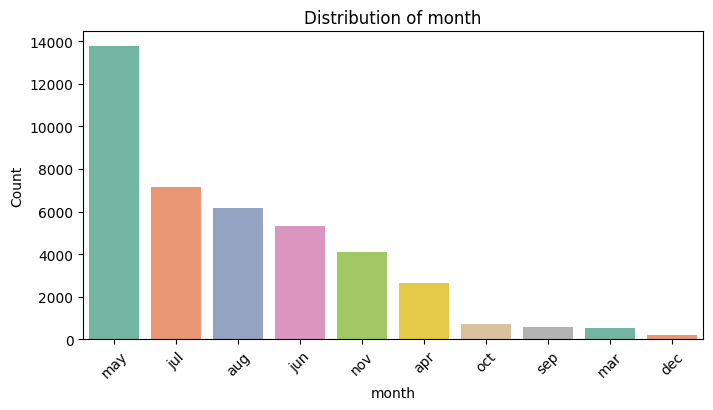

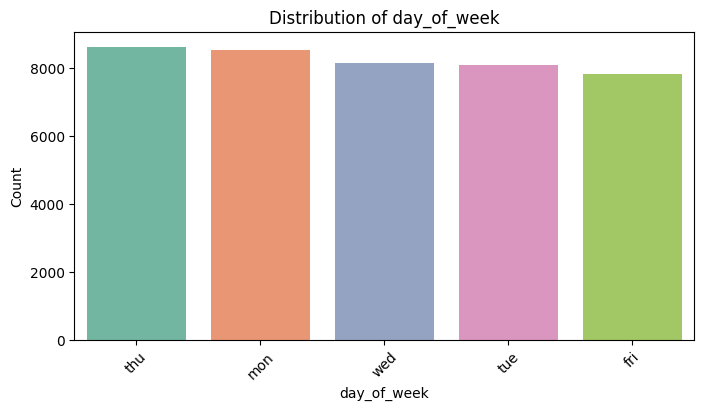

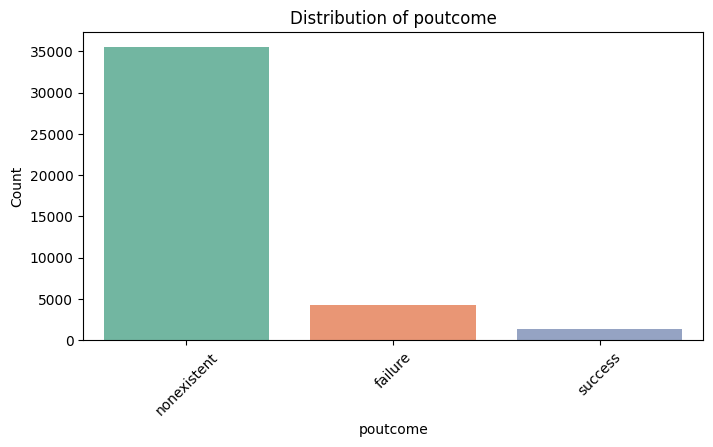

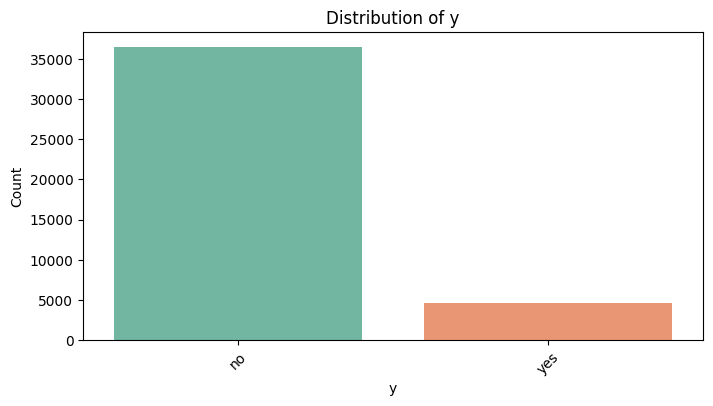

In [70]:
# Categorical Variables Distribution
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"\nCategorical Columns: {list(categorical_columns)}")

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

##### Frequency of categories using count plots. Class imbalances in the target variable (y), which could influence model selection and evaluation.
##### Why It's Relevant:
##### Provides a baseline understanding of each variable.
##### Highlights potential preprocessing needs, like handling outliers or balancing the target variable.


# Bivariate Analysis

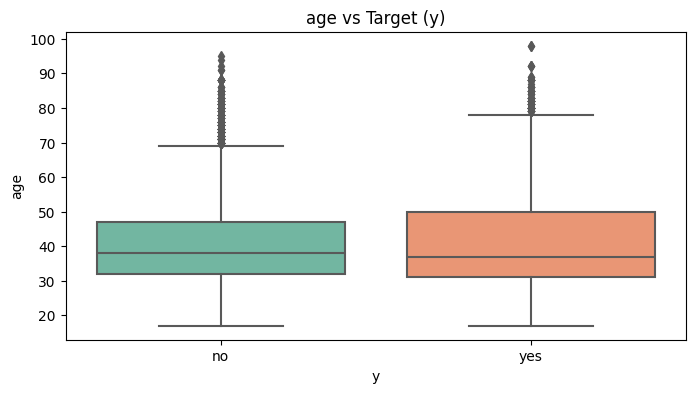

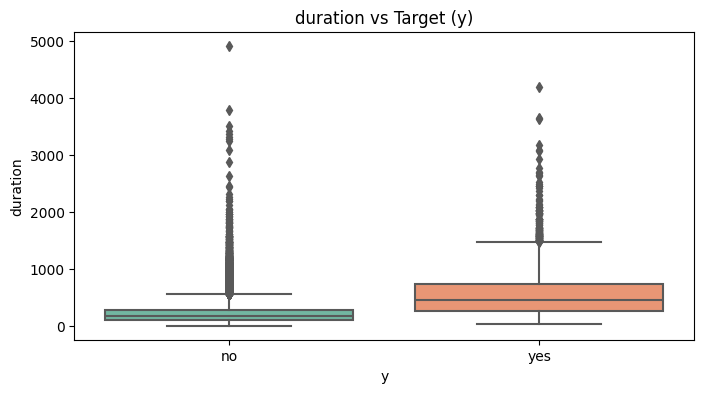

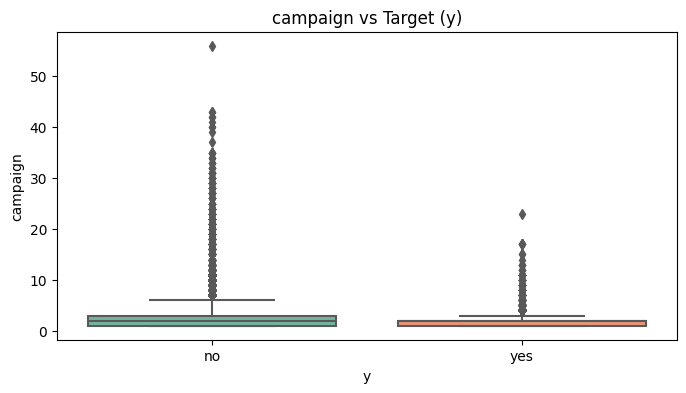

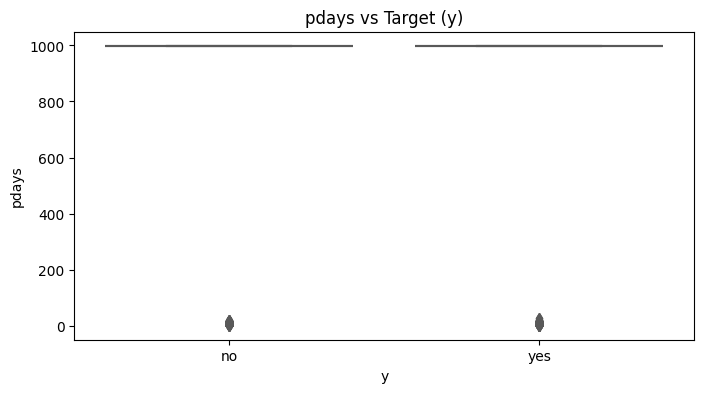

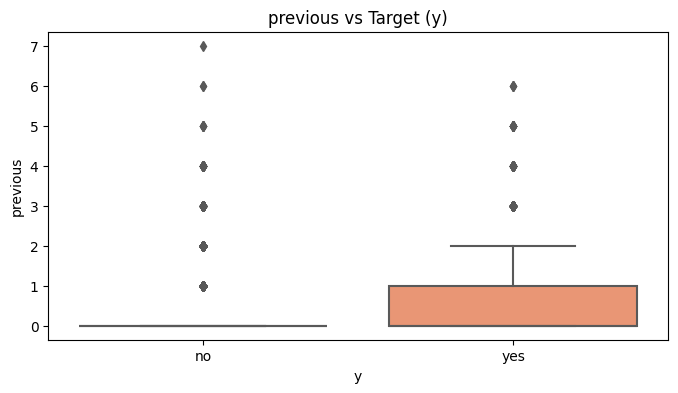

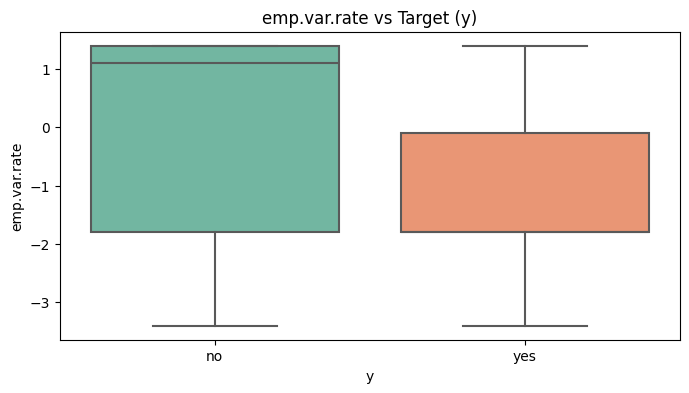

In [71]:
for col in ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='y', y=col, palette='Set2')
    plt.title(f'{col} vs Target (y)')
    plt.xlabel('y')
    plt.ylabel(col)
    plt.show()


#### Distribution of numerical variables across categories of the target variable using boxplots or violin plots. How variables like age, duration, or campaign differ for subscribed (y=yes) and non-subscribed (y=no) clients.

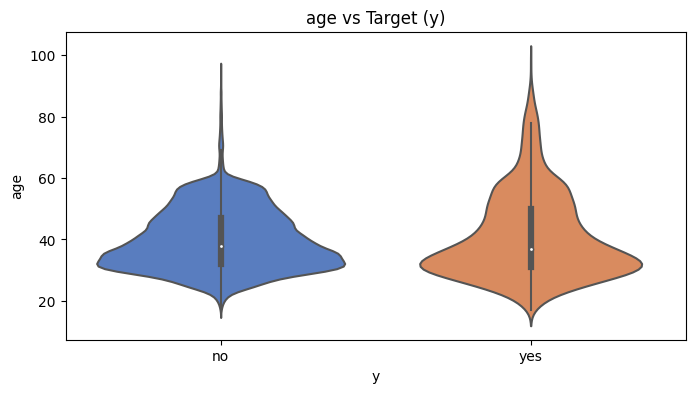

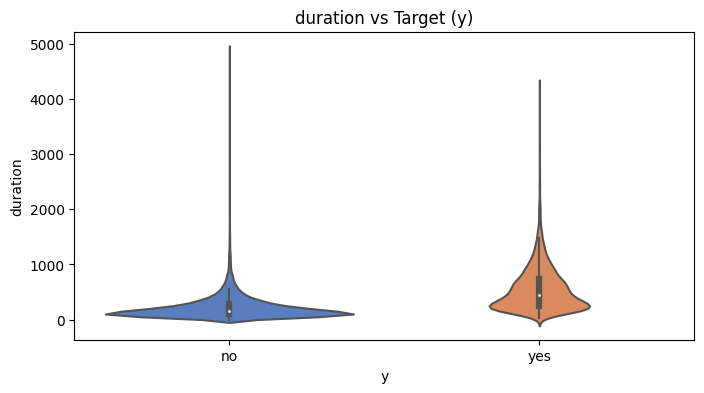

In [72]:
for col in ['age', 'duration']:
    plt.figure(figsize=(8, 4))
    sns.violinplot(data=data, x='y', y=col, palette='muted')
    plt.title(f'{col} vs Target (y)')
    plt.xlabel('y')
    plt.ylabel(col)
    plt.show()

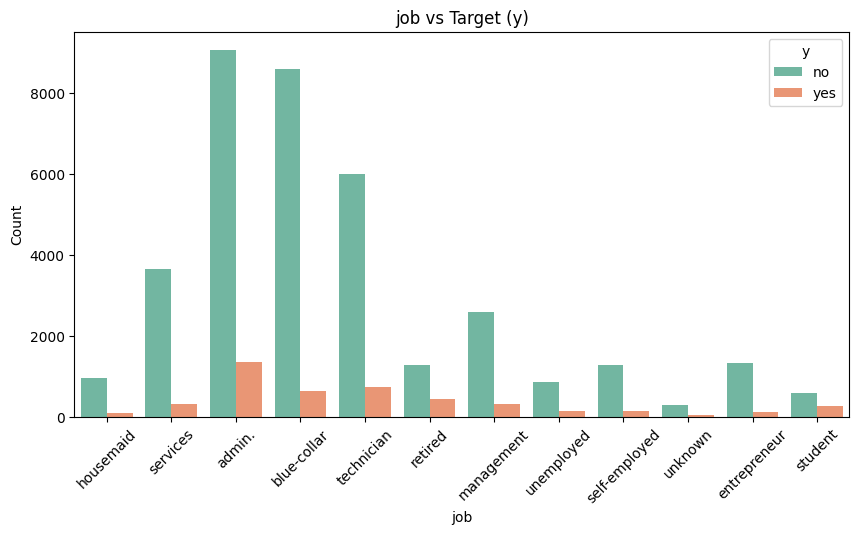

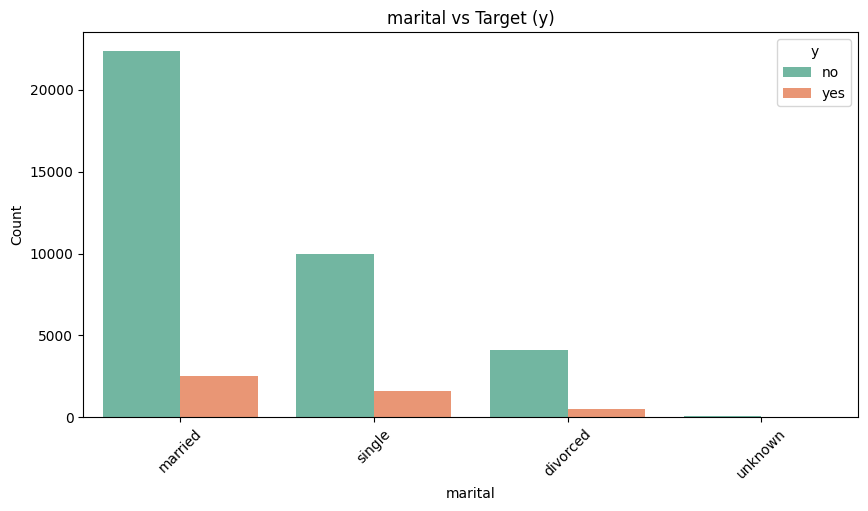

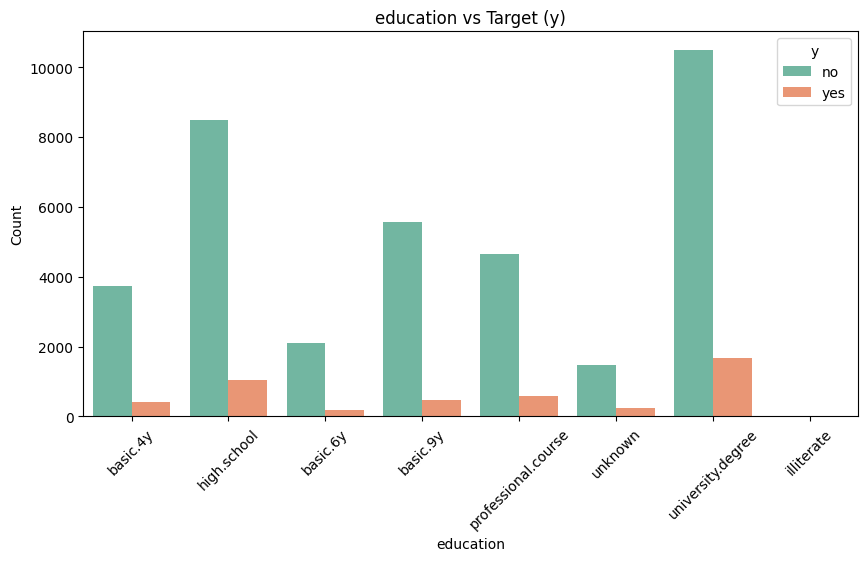

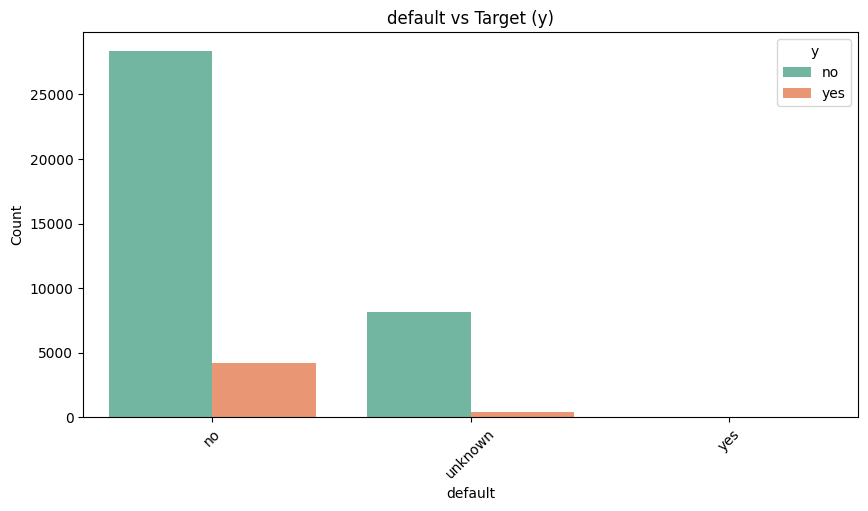

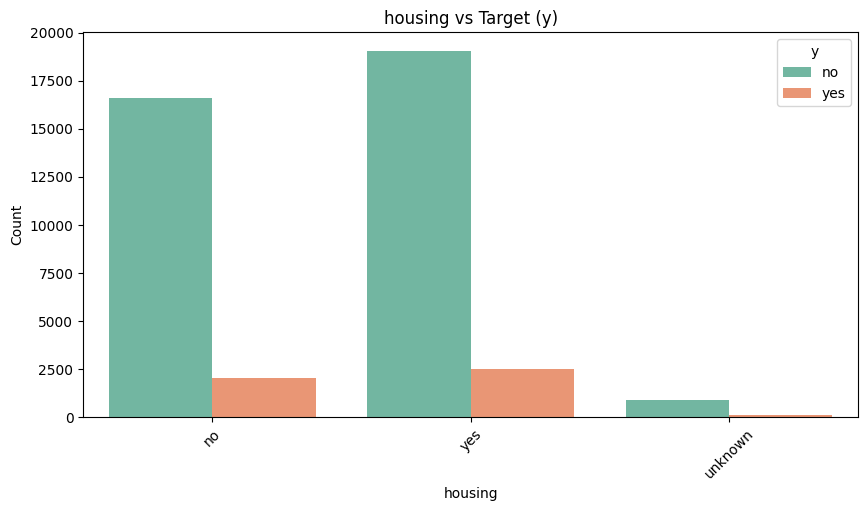

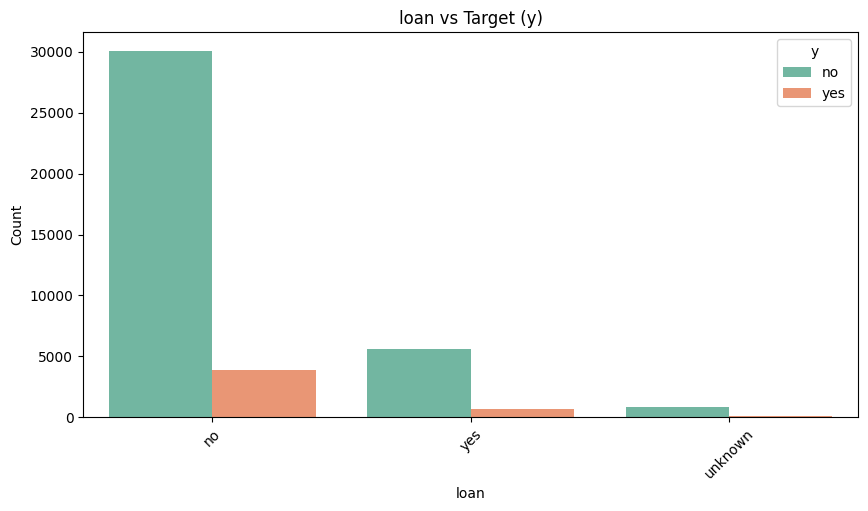

In [73]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, hue='y', palette='Set2')
    plt.title(f'{col} vs Target (y)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

##### Interactions between categorical features and the target variable using count plots or stacked bar charts. Which categories are more likely to lead to a successful subscription (e.g., specific job types or education levels).

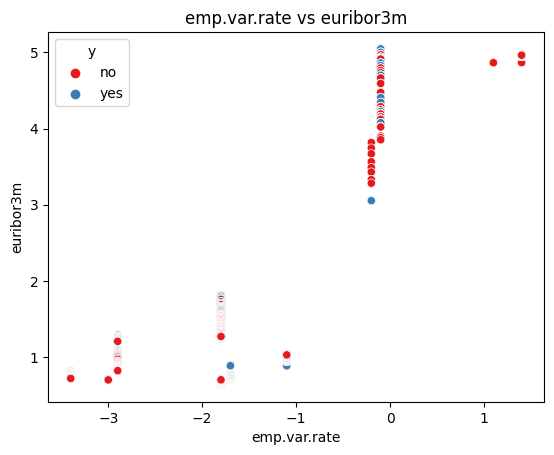

In [74]:
sns.scatterplot(data=data, x='emp.var.rate', y='euribor3m', hue='y', palette='Set1')
plt.title('emp.var.rate vs euribor3m')
plt.show()


##### Relationships between numerical variables using scatterplots and correlation heatmaps. Patterns or trends (e.g., linear or non-linear relationships).

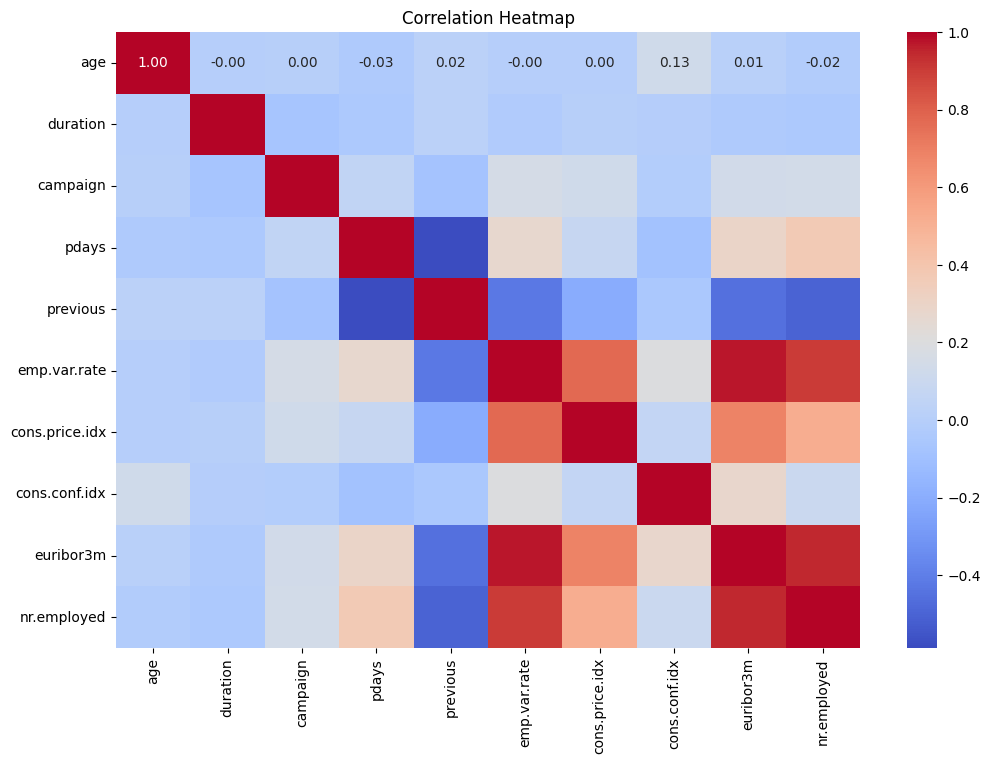

In [75]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##### Strong positive or negative correlations: If two variables have a high positive or negative correlation (e.g., 0.8 or -0.8), it means that one variable tends to increase as the other increases or decreases. This is useful for understanding which features might have the most significant impact on a target variable or which variables may be redundant. Weak or no correlation: If the correlation is close to 0, it suggests that the two variables are not strongly related, and you may not need both features for model building.

##### By analyzing correlations, you can determine which features are most strongly associated with the target variable (y) or with each other. This helps in:Feature selection: Removing highly correlated features to avoid multicollinearity, which can affect the performance of certain machine learning algorithms like linear regression. Feature engineering: If certain features are strongly related, you might combine them (e.g., using their difference or ratio) to create more meaningful features.

# Multivariate Analysis

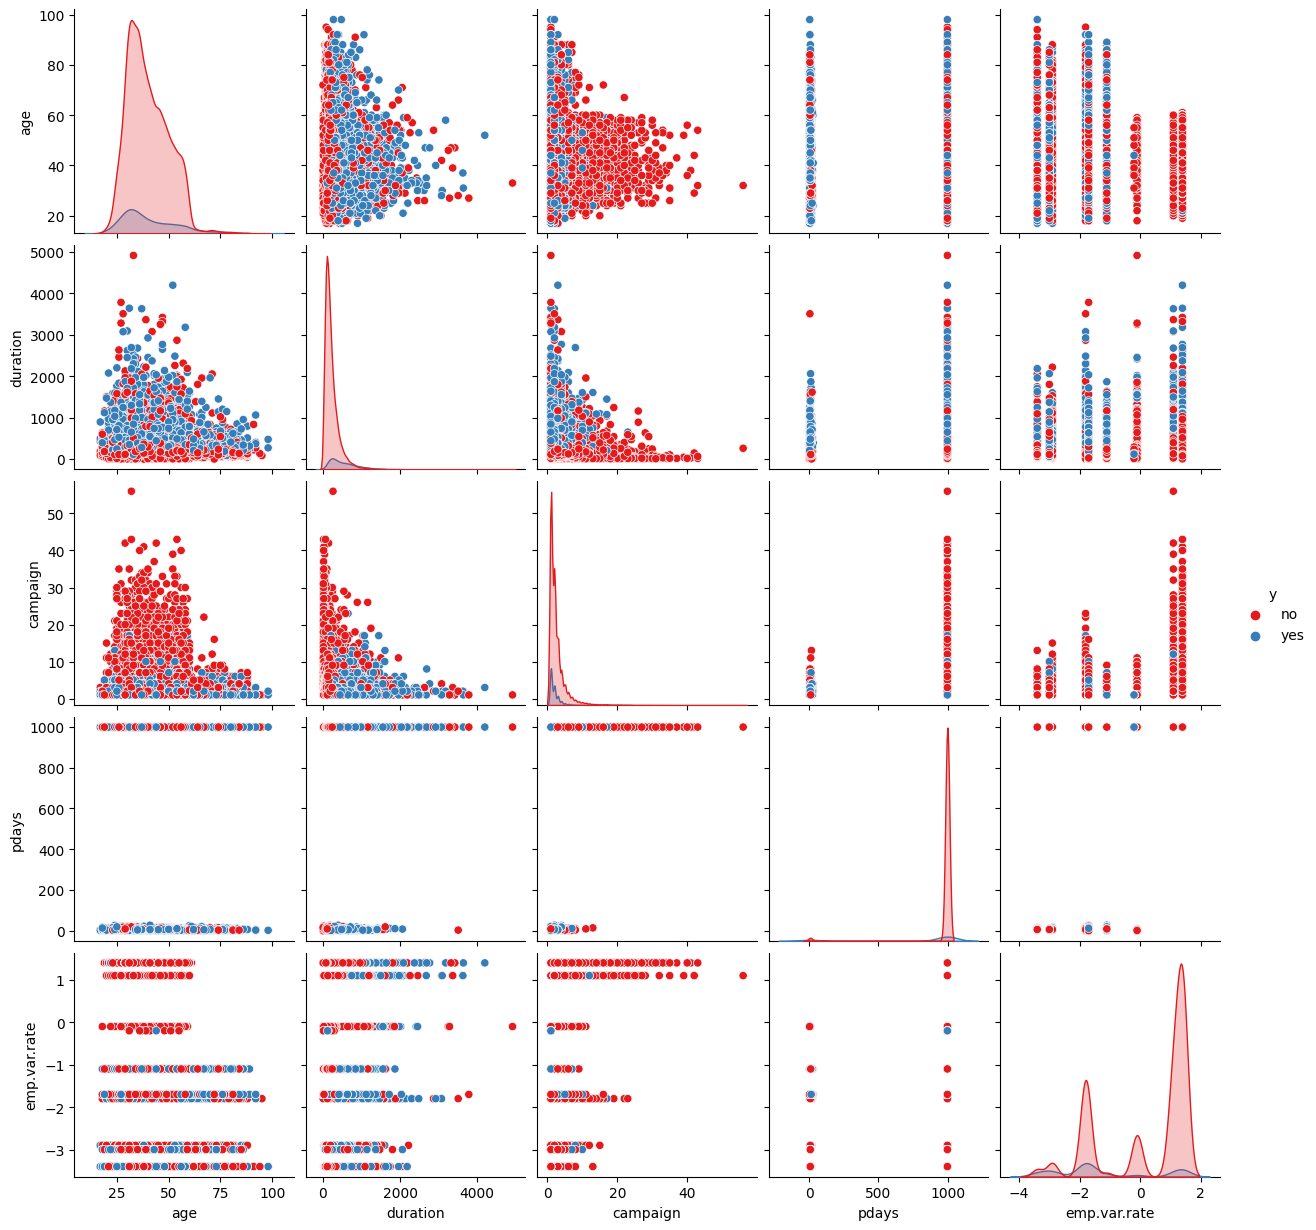

In [76]:
sns.pairplot(data, vars=['age', 'duration', 'campaign', 'pdays', 'emp.var.rate'], hue='y', palette='Set1')
plt.show()

##### Visualizes pairwise relationships between numerical variables while considering the target variable. This shows clusters or patterns for different classes of y.

# HYPOTHESIS TESTING

#### H₀: The mean age of clients who subscribed is equal to the mean age of clients who did not subscribe.
#### (H₁): The mean age of clients who subscribed is not equal to the mean age of clients who did not subscribe.

In [78]:

# Assuming 'data' is your DataFrame and 'y' is the target variable
subscribed = data[data['y'] == 'yes']
not_subscribed = data[data['y'] == 'no']

# Perform t-test
t_stat, p_val = stats.ttest_ind(subscribed['age'], not_subscribed['age'])
print(f'T-statistic: {t_stat}, P-value: {p_val}')

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The mean age is different.")
else:
    print("Fail to reject the null hypothesis: The mean age is the same.")

T-statistic: 6.172087109640128, P-value: 6.80213641846347e-10
Reject the null hypothesis: The mean age is different.


#### (H₀): Education level and subscription are independent.
#### (H₁): Education level and subscription are dependent.

In [80]:
contingency_table_education = pd.crosstab(data['education'], data['y'])

# Perform Chi-Square test
chi2_stat_edu, p_val_edu, dof_edu, expected_edu = chi2_contingency(contingency_table_education)
print(f'Chi2 Statistic for Education: {chi2_stat_edu}, P-value: {p_val_edu}')

# Interpret the result
if p_val_edu < alpha:
    print("Reject the null hypothesis: Education level influences subscription.")
else:
    print("Fail to reject the null hypothesis: Education level does not influence subscription.")

Chi2 Statistic for Education: 193.10590454149565, P-value: 3.3051890144025054e-38
Reject the null hypothesis: Education level influences subscription.


#### (H₀): Duration does not impact the likelihood of subscription.
#### (H₁): Duration impacts the likelihood of subscription.

In [81]:
# Assuming you want to compare the duration across different months
duration_by_month = data.groupby('month')['duration']

# Perform ANOVA test
f_stat, p_val = stats.f_oneway(*[duration_by_month.get_group(month) for month in duration_by_month.groups])
print(f'F-statistic: {f_stat}, P-value: {p_val}')

# Interpret the result
if p_val < alpha:
    print("Reject the null hypothesis: Duration is related to subscription.")
else:
    print("Fail to reject the null hypothesis: Duration is not related to subscription.")

F-statistic: 23.347619784281978, P-value: 3.1888330556564943e-40
Reject the null hypothesis: Duration is related to subscription.


#### (H₀): There is no correlation between employment rate and subscription.
#### (H₁): There is a correlation between employment rate and subscription.

In [82]:
# Convert 'y' to a binary variable
data['y_binary'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Perform Pearson correlation test
corr, p_val_corr = stats.pearsonr(data['emp.var.rate'], data['y_binary'])
print(f'Correlation coefficient: {corr}, P-value: {p_val_corr}')

# Interpret the result
if p_val_corr < alpha:
    print("Reject the null hypothesis: There is a correlation between employment rate and subscription.")
else:
    print("Fail to reject the null hypothesis: There is no correlation between employment rate and subscription.")

Correlation coefficient: -0.29833442615937844, P-value: 0.0
Reject the null hypothesis: There is a correlation between employment rate and subscription.


#### (H₀): Housing loan and subscription are independent.
#### (H₁): Housing loan and subscription are dependent.

In [85]:
contingency_table_loan = pd.crosstab(data['housing'], data['y'])

# Perform Chi-Square test
chi2_stat_loan, p_val_loan, dof_loan, expected_loan = chi2_contingency(contingency_table_loan)
print(f'Chi2 Statistic for Housing Loan: {chi2_stat_loan}, P-value: {p_val_loan}')

# Interpret the result
if p_val_loan < alpha:
    print("Reject the null hypothesis: Housing loan influences subscription.")
else:
    print("Fail to reject the null hypothesis: Housing loan does not influence subscription.")

Chi2 Statistic for Housing Loan: 5.684495858974168, P-value: 0.05829447669453452
Fail to reject the null hypothesis: Housing loan does not influence subscription.


# QUESTIONS

#### What is the subscription distribution?

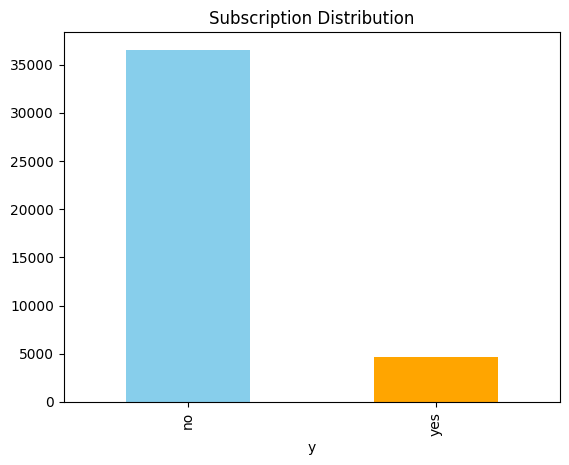

In [86]:
data['y'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], title='Subscription Distribution');

##### Observation : There were more cases of No subscription than actual subscription.

#### How does the duration of the call affect the likelihood of subscription?

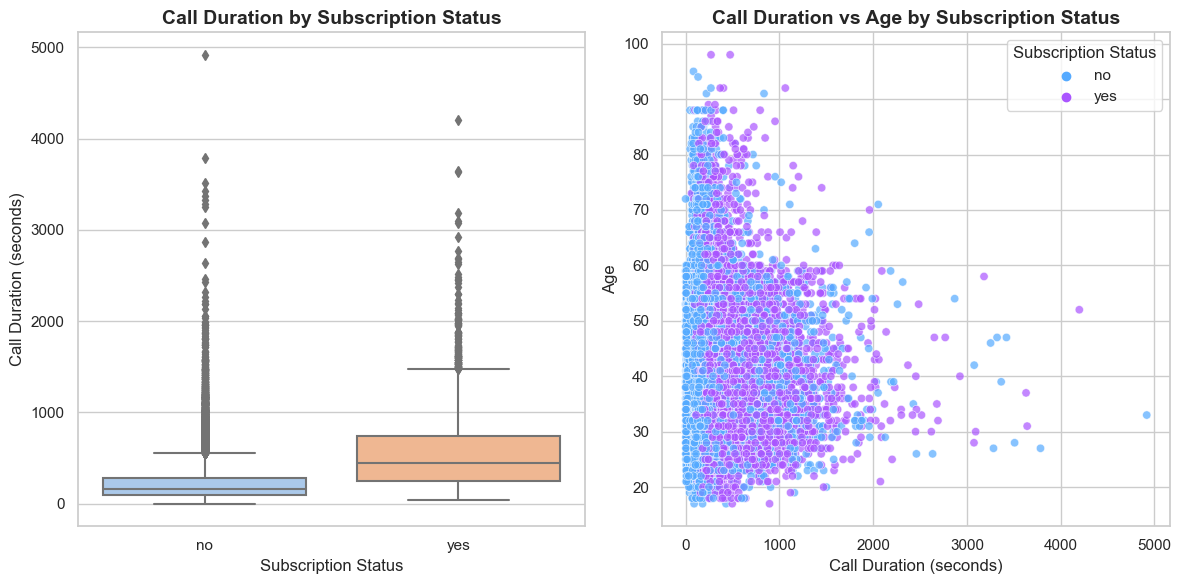

In [101]:
# Set a style for the plots
sns.set_theme(style="whitegrid")

# Adjust figure size
plt.figure(figsize=(12, 6))

# Boxplot for duration vs. subscription
plt.subplot(1, 2, 1)  # Create a 1x2 grid, this is the first plot
sns.boxplot(x='y', y='duration', data=data, palette='pastel')
plt.title('Call Duration by Subscription Status', fontsize=14, weight='bold')
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Call Duration (seconds)', fontsize=12)

# Scatterplot for duration vs. age with hue for subscription
plt.subplot(1, 2, 2)  # This is the second plot
sns.scatterplot(x='duration', y='age', hue='y', data=data, palette='cool', alpha=0.7)
plt.title('Call Duration vs Age by Subscription Status', fontsize=14, weight='bold')
plt.xlabel('Call Duration (seconds)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Subscription Status')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

##### Observation : The call duration by Subscription shows a longer engagement with clients increases their chances of subscription status.

#### Is there a monthly trend in subscription rates?

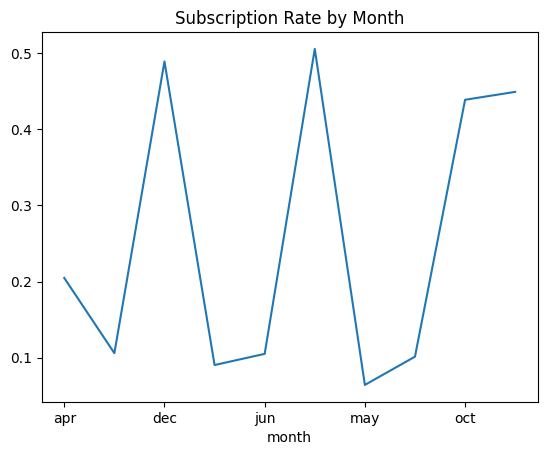

In [95]:
data.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'].plot(kind='line', title='Subscription Rate by Month');

##### Observation : The subscription rate by month shows a slightly higher rate of subscription in December. 

#### Which job types are more likely to subscribe?

<Axes: xlabel='count', ylabel='job'>

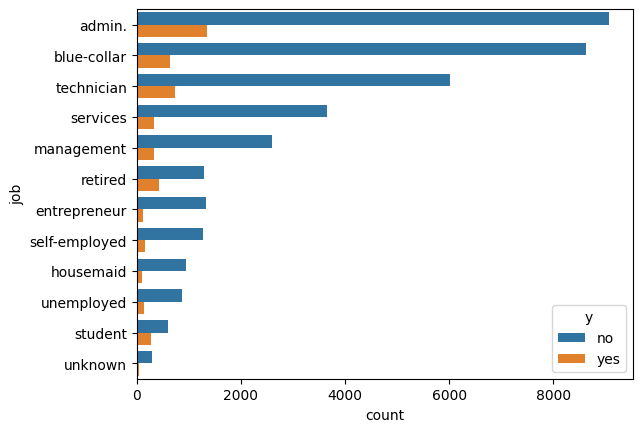

In [96]:
sns.countplot(y='job', hue='y', data=data, order=data['job'].value_counts().index)

##### Observation : The subscription is are the higher with clients in the Admnin Services. 

#### How does the employment variation rate affect subscription?

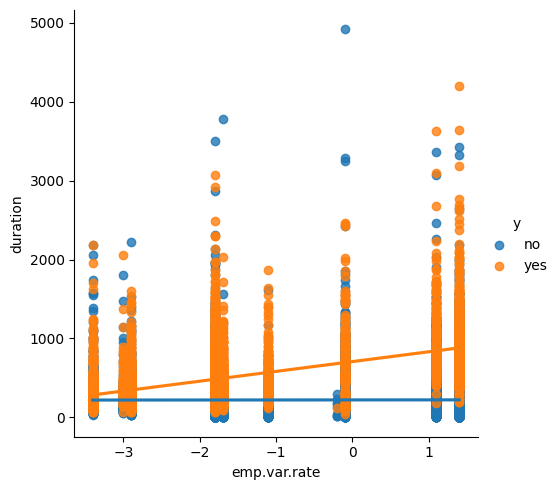

In [97]:
sns.lmplot(x='emp.var.rate', y='duration', hue='y', data=data)

##### Observation : The employment variation rate has some effect on subscription.

#### Does the day of the week affect subscription?

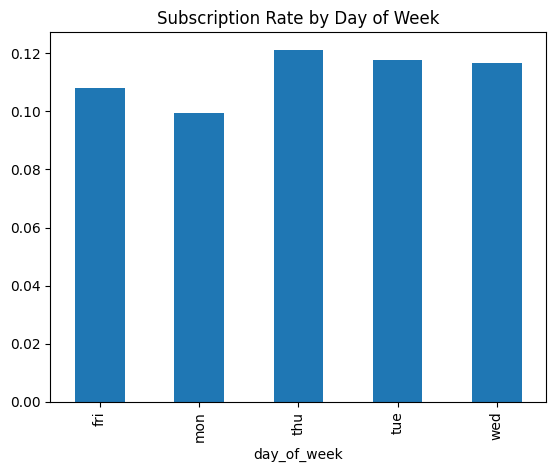

In [100]:
data.groupby('day_of_week')['y'].value_counts(normalize=True).unstack()['yes'].plot(kind='bar', title='Subscription Rate by Day of Week');

##### Observation : There is a slight hike effect on subscription on thursdays and a lower downturn effect on subscription on Mondays.

In [ ]:
# Drop the 'y_binary' column
# data = data.drop(columns=['y_binary'])

In [94]:
# data.columns

In [77]:
# # Create a NumPy array to represent the target variable
# target = np.where(data['y'] == 'Yes', 1, 0)

# # Assign the new NumPy array to the 'Churn' column
# data['y'] = target

# # Verify the conversion
# data['y'].unique 

In [33]:
# data1= pd.read_csv('C:Asset/bank-additional.csv', sep=';')

In [34]:
# data1

In [35]:
# data2= pd.read_csv('C:Asset/bank-full.csv', sep=';')

In [36]:
# data2

In [37]:
# data3= pd.read_csv('C:Asset/bank.csv', sep=';')

In [38]:
# data3